Install tools

In [213]:
#! pip install tweepy --user
#! pip install panda --user
#! pip install TextBlob --user

In [214]:
# ! pip install matplotlib
# ! pip install wordcloud

Import the tools

In [215]:
import tweepy
import confiq
import pandas as pd
import re
from textblob import TextBlob #untuk menghitung sentimen berbahasa inggris

Input token and user_input for search term

In [216]:
client = tweepy.Client(bearer_token=confiq.bearer_token)

user_input = input('mau nyari apa? ')
RT = input("Dengan ReTweet atau Tidak: (y/n) ")

if RT == 'y':
   query = f'{user_input} is:retweet'
else:
   query = f'{user_input} -is:retweet'

mau nyari apa? tanaman bunga
Dengan ReTweet atau Tidak: (y/n) n


Make a list for each variabel

In [217]:
Tweet_id =[]
Created_at =[]
Tweet = []
Opini = []

query for get the tweet id and twee

In [218]:
response =tweepy.Paginator(client.search_recent_tweets,query=query, max_results=100).flatten(limit=1000)

processing the tweet

In [219]:
for tweet in response:
    Created_at.append(tweet.created_at)
    Tweet_id.append(tweet.id)
    clean_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet.text).split())
    Tweet.append(clean_tweet)
    analytic = TextBlob(clean_tweet).sentiment.polarity
    if analytic > 0.0:
        Opini.append('Positif')
    elif analytic == 0:
        Opini.append('Netral')
    else:
        Opini.append('Negatif')



put the output into data frame using pandas

In [220]:
df = pd.DataFrame(list(zip(Created_at, Tweet_id, Tweet, Opini)), columns=['Created-at', 'Tweet ID', 'Tweet', 'Opini'])

In [221]:
print(df)

    Created-at             Tweet ID  \
0         None  1557154990367842304   
1         None  1557129028087484416   
2         None  1557129020679917569   
3         None  1557129015642664960   
4         None  1557129010030997505   
..         ...                  ...   
305       None  1554675619782598657   
306       None  1554660699158499328   
307       None  1554647960277110784   
308       None  1554640204102635520   
309       None  1554636699241627648   

                                                 Tweet    Opini  
0    Mau juga punya tanaman bunga kertas yang kerta...   Netral  
1    FLASH SALE GGS PT08 Tanaman Bunga Bonsai Plast...  Negatif  
2    FLASH SALE GGS PT08 Tanaman Bunga Bonsai Plast...  Negatif  
3    FLASH SALE GGS PT08 Tanaman Bunga Bonsai Plast...  Negatif  
4    FLASH SALE GGS PT08 Tanaman Bunga Bonsai Plast...  Negatif  
..                                                 ...      ...  
305  salah satu lokasi yang Ethan gunakan untuk mem...   Netral  
306

Printing to csv

In [222]:
#df.to_csv(f'saving {user_input} to scv.csv')

#Make the tweet to wordcloud

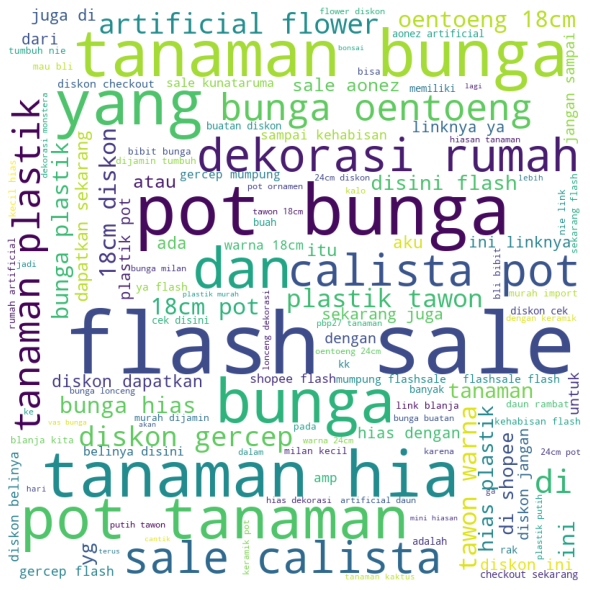

In [223]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()